In [1]:
from interpret import set_visualize_provider
from interpret.provider import DashProvider
set_visualize_provider(DashProvider.from_address(('127.0.0.1', 7001)))
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd
from sklearn.model_selection import train_test_split

from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show
from sklearn.ensemble import RandomForestClassifier
import xgboost
from interpret.blackbox import MorrisSensitivity
from interpret.blackbox import PartialDependence
from interpret.blackbox import ShapKernel
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from collections import Counter
import seaborn as sns

/home/aum/all_envs/bajaj/lib/python3.8/site-packages/interpret/visual/udash.py:5: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
/home/aum/all_envs/bajaj/lib/python3.8/site-packages/interpret/visual/udash.py:6: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/home/aum/all_envs/bajaj/lib/python3.8/site-packages/interpret/visual/udash.py:7: UserWarning: 
The dash_table package is deprecated. Please replace
`import dash_table` with `from dash import dash_table`

Also, if you're using any of the table format helpers (e.g. Group), replace 
`from dash_table.Format import Group` with 
`from dash.dash_table.Format import Group`
  import dash_table as dt


In [138]:
df = pd.read_csv("Starbucks_store_1yr_Performance.csv")
places = pd.read_csv("places_index_may.csv")
prices = pd.read_csv("prices_index_may.csv")

In [140]:
places_cols = places.isnull().sum()/places.shape[0]

In [141]:
pcols = places_cols[places_cols<1].index

In [142]:
places1 = places[pcols]

In [143]:
places1.columns

Index(['subDistrictName', 'districtCode', 'districtName', 'pincode', 'type',
       'auto', 'shop', 'city', 'localityName', 'food', 'transport', 'health',
       'locality', 'facility', 'WBIPlacesNormalizedCity', 'building',
       'h3resolution', 'service', 'leisure', 'travel', 'h3index', 'stateName',
       'pincode_area'],
      dtype='object')

In [144]:
places1 = places1.rename({"h3index":"H9_Index"}, axis="columns")

In [145]:
df2 = df.merge(places1, on = "H9_Index", how="left")

<AxesSubplot:>

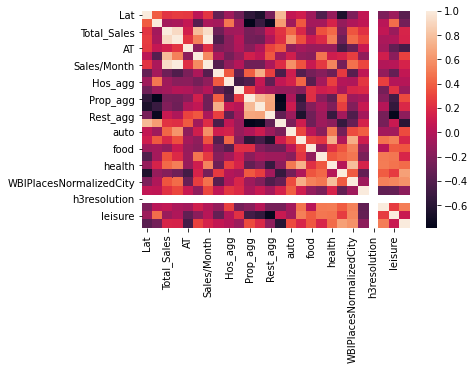

In [147]:
sns.heatmap(df2.corr(method="spearman"))

In [179]:
prit = prices[prices["h3index"] == test_h3].dropna(axis=1)
prit = prit.rename({"h3index":"H9_Index"}, axis="columns")

In [178]:
plat =places[places["h3index"] == test_h3].dropna(axis=1)
plat = plat.rename({"h3index":"H9_Index"}, axis="columns")

In [182]:
plat.columns

Index(['subDistrictName', 'districtCode', 'districtName', 'pincode', 'type',
       'auto', 'shop', 'city', 'localityName', 'food', 'transport', 'health',
       'locality', 'facility', 'WBIPlacesNormalizedCity', 'building',
       'h3resolution', 'service', 'leisure', 'travel', 'H9_Index', 'stateName',
       'pincode_area'],
      dtype='object')

In [185]:
prit.columns

Index(['subDistrictName', 'districtCode', 'districtName', 'pincode', 'type',
       'schoolIndexMean', 'city', 'localityName', 'ppoi_index', 'h3resolution',
       'hospital_index', 'commercial_index', 'WBIPricesNormalizedCity',
       'H9_Index', 'property_index', 'stateName', 'pincode_area',
       'RestaurantMeanPrice'],
      dtype='object')

In [187]:
prit2 = prit[['hospital_index', 'commercial_index', 'WBIPricesNormalizedCity','property_index', "RestaurantMeanPrice",
            "H9_Index", "schoolIndexMean"]]

In [189]:
test = plat.merge(prit2, on ="H9_Index", how="left")

In [190]:
test.columns

Index(['subDistrictName', 'districtCode', 'districtName', 'pincode', 'type',
       'auto', 'shop', 'city', 'localityName', 'food', 'transport', 'health',
       'locality', 'facility', 'WBIPlacesNormalizedCity', 'building',
       'h3resolution', 'service', 'leisure', 'travel', 'H9_Index', 'stateName',
       'pincode_area', 'hospital_index', 'commercial_index',
       'WBIPricesNormalizedCity', 'property_index', 'RestaurantMeanPrice',
       'schoolIndexMean'],
      dtype='object')

In [297]:
test.columns

Index(['subDistrictName', 'districtCode', 'districtName', 'pincode', 'type',
       'auto', 'shop', 'city', 'localityName', 'food', 'transport', 'health',
       'locality', 'facility', 'WBIPlacesNormalizedCity', 'building',
       'h3resolution', 'service', 'leisure', 'travel', 'H9_Index', 'stateName',
       'pincode_area', 'hospital_index', 'commercial_index',
       'WBIPricesNormalizedCity', 'property_index', 'RestaurantMeanPrice',
       'schoolIndexMean'],
      dtype='object')

In [169]:
test_h3 = "89608b4465bffff" #H9 Index of recommended Store

In [148]:
df2.head()

,Store,Lat,Long,Total_Sales,ADT,AT,Month,Sales/Month,H9_Index,School_agg,...,locality,facility,WBIPlacesNormalizedCity,building,h3resolution,service,leisure,travel,stateName,pincode_area
0,Cyprus Mulund,19.181139,72.940678,1677546.0,55.0,533.0,3.0,5.591820e+05,89608b55ecbffff,0.842297,...,Mulund West,62.891667,4.795605,360.0,9.0,58.146667,30.0,11.729,Maharashtra,S.B. Road
1,Carter Road Bandra,19.070757,72.822675,15074361.0,156.0,545.0,7.0,2.153480e+06,89608b086c7ffff,0.767364,...,Pali Hills,110.516667,5.363042,414.0,9.0,19.456667,0.0,20.820,Maharashtra,Khar Delivery
2,Khalsa College,19.026113,72.856368,16895887.0,182.0,497.0,7.0,2.413698e+06,89608b0a6cbffff,0.845283,...,Matunga East,280.500000,9.139592,440.0,9.0,96.200000,118.0,77.875,Maharashtra,Matunga
3,Ghatkopar East,19.077112,72.907052,17329076.0,126.0,489.0,11.0,1.575371e+06,89608b56863ffff,0.794123,...,Ghatkopar East,162.891667,5.878858,783.0,9.0,33.216667,30.0,29.270,Maharashtra,Rajawadi
4,Bandra Turner Road,19.059420,72.837070,53515480.0,263.0,530.0,13.0,4.116575e+06,89608b0b11bffff,0.814898,...,Bandra West,77.000000,6.306280,549.0,9.0,43.200000,0.0,28.570,Maharashtra,Bandra West


In [149]:
df2["Sales/Month"]

0     5.591820e+05
1     2.153480e+06
2     2.413698e+06
3     1.575371e+06
4     4.116575e+06
5     2.179093e+06
6     3.973157e+06
7     2.772806e+06
8     2.037167e+06
9     3.728952e+06
10    3.613295e+06
11    1.395064e+06
12    3.136326e+06
13    3.856443e+06
14    3.336117e+06
Name: Sales/Month, dtype: float64

In [150]:
df2.columns

Index(['Store', 'Lat', 'Long', 'Total_Sales', 'ADT', 'AT', 'Month',
       'Sales/Month', 'H9_Index', 'School_agg', 'Hos_agg', 'Comm_agg',
       'Prop_agg', 'WBI_agg', 'Rest_agg', 'subDistrictName', 'districtCode',
       'districtName', 'pincode', 'type', 'auto', 'shop', 'city',
       'localityName', 'food', 'transport', 'health', 'locality', 'facility',
       'WBIPlacesNormalizedCity', 'building', 'h3resolution', 'service',
       'leisure', 'travel', 'stateName', 'pincode_area'],
      dtype='object')

In [193]:
df2 = df2.rename({"Sales/Month":"Sales_Month"}, axis="columns")

In [328]:
feats = [ 
    'School_agg', 'Hos_agg', 'Comm_agg',
       'Prop_agg', 'WBI_agg', 'Rest_agg',
          'auto', 'shop', 
        'food', 'transport', 'health', 'facility', 'WBIPlacesNormalizedCity', 'building',  'service',
       'leisure', 'travel',]
labs=["Sales_Month"] 

In [457]:
X= df2[feats]
Y = df2[labs].astype(int)

In [494]:
new_binned = []
X_new = pd.DataFrame(columns = feats)
for feat in feats:
#     new_feat = pd.cut(X[feat].values.reshape(1,-1)[0], 4)
#     new_feat = new_feat.to_list()
    iqr = X[feat].describe().loc['75%'] - X[feat].describe().loc['25%']
    X_new[feat] = X[feat].clip(X[feat].describe().loc['25%']-iqr, X[feat].describe().loc['75%']+iqr)
    X_new[feat] = X_new[feat].astype(float)
    scaler = StandardScaler()
    X_new[feat]= (X_new[feat] - X_new[feat].min())/(X_new[feat].max() - X_new[feat].min())
    #print(scaler.fit_transform(X_new[feat].values.reshape(1,-1))[0])
#     scaler.fit(X_new[feat].values.reshape(1,-1))
#     X_new[feat]= scaler.transform(X_new[feat].values.reshape(1,-1))[0]
    
#     new_binned.append(new_feat)
#     X_new[feat] = new_feat

In [495]:
# X_new = X_new.astype(str)

<AxesSubplot:>

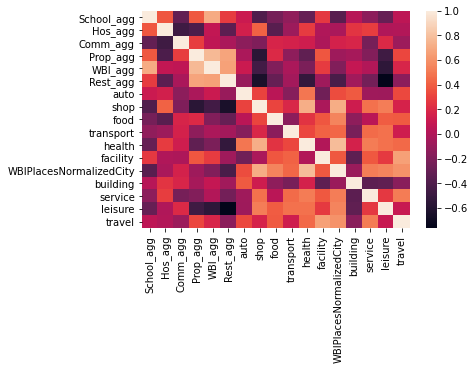

In [559]:
sns.heatmap(X_new.corr(method="spearman"))

In [332]:
Y.values.reshape(1,-1)[0]

array([ 559182, 2153480, 2413698, 1575370, 4116575, 2179093, 3973157,
       2772805, 2037167, 3728952, 3613295, 1395063, 3136325, 3856442,
       3336117])

In [534]:
Y_new = pd.cut(Y.values.reshape(1,-1)[0], 8)
Y_new = Y_new.to_list()
Y_new = [str(f) for f in Y_new]

In [535]:
# dir(Y_new)
Counter(Y_new)

Counter({'(555624.607, 1003856.125]': 1,
         '(1893204.375, 2337878.5]': 3,
         '(2337878.5, 2782552.625]': 2,
         '(1448530.25, 1893204.375]': 1,
         '(3671900.875, 4116575.0]': 4,
         '(3227226.75, 3671900.875]': 2,
         '(1003856.125, 1448530.25]': 1,
         '(2782552.625, 3227226.75]': 1})

In [536]:
# Y_map = {'(1448530.25, 2337878.5]':1,
#  '(2337878.5, 3227226.75]':2,
#  '(3227226.75, 4116575.0]':3,
#  '(555624.607, 1448530.25]':0}

Y_map ={"(555624.607, 1744979.667]" : 0,
    "(1744979.667, 2930777.333]":1,
    "(2930777.333, 4116575.0]":2
}
Y_map= {'(555624.607, 1270660.6]': 0,
         '(1982139.2, 2693617.8]': 2,
         '(1270660.6, 1982139.2]': 1,
         '(3405096.4, 4116575.0]': 4,
         '(2693617.8, 3405096.4]': 3}
Y_map = {'(555624.607, 914921.3]': 0,
         '(1982139.2, 2337878.5]': 2,
         '(2337878.5, 2693617.8]': 3,
         '(1270660.6, 1626399.9]': 1,
         '(3760835.7, 4116575.0]': 7,
         '(2693617.8, 3049357.1]': 4,
         '(3405096.4, 3760835.7]': 6,
         '(3049357.1, 3405096.4]': 5}
Y_map = {'(555624.607, 1003856.125]': 0,
         '(1893204.375, 2337878.5]': 3,
         '(2337878.5, 2782552.625]': 4,
         '(1448530.25, 1893204.375]': 2,
         '(3671900.875, 4116575.0]': 7,
         '(3227226.75, 3671900.875]': 6,
         '(1003856.125, 1448530.25]': 1,
         '(2782552.625, 3227226.75]': 5}

In [537]:
Y_cat = pd.Series(Y_new).map(Y_map)

In [538]:
X.columns

Index(['School_agg', 'Hos_agg', 'Comm_agg', 'Prop_agg', 'WBI_agg', 'Rest_agg',
       'auto', 'shop', 'food', 'transport', 'health', 'facility',
       'WBIPlacesNormalizedCity', 'building', 'service', 'leisure', 'travel'],
      dtype='object')

In [539]:
# Y_new = Y_new.astype(str)
test.columns

Index(['subDistrictName', 'districtCode', 'districtName', 'pincode', 'type',
       'auto', 'shop', 'city', 'localityName', 'food', 'transport', 'health',
       'locality', 'facility', 'WBIPlacesNormalizedCity', 'building',
       'h3resolution', 'service', 'leisure', 'travel', 'H9_Index', 'stateName',
       'pincode_area', 'hospital_index', 'commercial_index',
       'WBIPricesNormalizedCity', 'property_index', 'RestaurantMeanPrice',
       'schoolIndexMean'],
      dtype='object')

In [540]:
test_req = test[[
    'schoolIndexMean','hospital_index', 'commercial_index', 'property_index',
         'WBIPricesNormalizedCity', 'RestaurantMeanPrice', 
                'auto', 'shop', 
        'food', 'transport', 'health', 'facility', 'WBIPlacesNormalizedCity', 'building',  'service',
       'leisure', 'travel',]]
test_req.columns = [
    'School_agg', 'Hos_agg', 'Comm_agg', 'Prop_agg', 'WBI_agg', 'Rest_agg',
                   'auto', 'shop', 
        'food', 'transport', 'health', 'facility', 'WBIPlacesNormalizedCity', 'building',  'service',
       'leisure', 'travel',]

In [541]:
test_req["School_agg"] = test_req["School_agg"]*10
test_req["Hos_agg"] = test_req["Hos_agg"]*10


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [542]:
X["School_agg"] = X["School_agg"]*10
X["Hos_agg"] = X["Hos_agg"]*10


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [543]:
X_new

,School_agg,Hos_agg,Comm_agg,Prop_agg,WBI_agg,Rest_agg,auto,shop,food,transport,health,facility,WBIPlacesNormalizedCity,building,service,leisure,travel
0,0.824879,1.000000,0.395716,0.000000,0.478425,0.066594,0.000000,0.199608,0.072554,0.103448,0.339469,0.000000,0.000000,0.337884,0.360069,0.254237,0.000000
1,0.409464,0.000000,0.701041,0.890133,0.652453,0.906428,0.000000,0.123876,1.000000,0.000000,0.000000,0.180324,0.205404,0.430034,0.000000,0.000000,0.124851
2,0.841435,0.529168,0.594260,0.401111,0.668390,0.000000,1.000000,0.797621,1.000000,0.367816,0.732854,0.823936,1.000000,0.474403,0.714213,1.000000,0.908412
3,0.557808,0.812488,0.738951,0.158529,0.448253,0.015528,0.000000,0.151599,0.221615,0.103448,0.237526,0.378633,0.392121,1.000000,0.128058,0.254237,0.240898
4,0.672985,0.425971,0.745159,0.445093,0.955831,0.753063,0.971429,0.146107,0.090309,0.367816,0.613241,0.053419,0.546841,0.660410,0.220968,0.000000,0.231285
5,1.000000,0.320284,0.604212,0.614727,0.845351,0.630621,0.000000,0.020356,0.215263,1.000000,0.110664,0.411447,0.201454,0.506826,0.036419,0.254237,0.123601
6,0.272958,0.563102,0.494249,0.019560,0.289140,0.037342,0.000000,1.000000,0.616588,1.000000,1.000000,0.858013,1.000000,0.382253,1.000000,0.847458,0.647133
7,0.446974,0.090244,1.000000,0.873095,0.547911,0.194907,0.138095,0.147882,0.542870,0.551724,0.748485,0.456284,0.957005,0.307167,0.352189,0.762712,1.000000
8,0.871441,0.043765,0.638731,1.000000,0.949347,0.608169,0.000000,0.000000,0.592073,0.103448,0.194371,0.817720,0.421010,0.238908,0.460300,0.000000,0.722255
9,0.000000,0.360976,0.519835,0.281459,0.499084,0.477672,0.190476,0.581025,0.174435,0.413793,0.561590,0.090714,0.571605,0.752560,0.943851,0.000000,0.337719


In [544]:

seed = 1
# X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.20, random_state=seed)


ebm = ExplainableBoostingClassifier(random_state=seed)
ebm.fit(X_new, Y_cat)

Multiclass is still experimental. Subject to change per release.
Detected multiclass problem: forcing interactions to 0


ExplainableBoostingClassifier(feature_names=['School_agg', 'Hos_agg',
                                             'Comm_agg', 'Prop_agg', 'WBI_agg',
                                             'Rest_agg', 'auto', 'shop', 'food',
                                             'transport', 'health', 'facility',
                                             'WBIPlacesNormalizedCity',
                                             'building', 'service', 'leisure',
                                             'travel'],
                              feature_types=['continuous', 'continuous',
                                             'continuous', 'continuous',
                                             'continuous', 'continuous',
                                             'continuous', 'continuous',
                                             'continuous', 'continuous',
                                             'continuous', 'continuous',
                                            

In [545]:
ebm.predict(test_req)

array([4])

In [546]:

dir(ebm)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_class_idx_',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_merged_pair_score_fn',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'additive_terms_',
 'available_explanations',
 'bagged_models_',
 'bin_budget_frac',
 'binning',
 'breakpoint_iteration_',
 'classes_',
 'composition',
 'decision_function',
 'delta',
 'early_stopping_rounds',
 'early_stopping_tolerance',
 'epsilon',
 'explain_global',
 'explain_local',
 'explainer_type',
 'feature_groups_',
 'fe

In [547]:
from interpret import show

ebm_global = ebm.explain_global()
show(ebm_global)

In [446]:
ebm_local = ebm.explain_local(test_req, [2])
show(ebm_local)

In [548]:
import lightgbm as lgb
model = xgboost.XGBClassifier( eval_metric = 'auc', max_depth = 3)
#     scale_pos_weight=50, n_estimators = 100, eval_metric = 'auc', max_depth = 4, learning_rate = 0.3)
# model = EasyEnsembleClassifier(n_estimators =10)
model_lgbm = lgb.LGBMClassifier( n_estimators = 100, max_depth=3)
        
        
model.fit(X_new, Y_cat)
model_lgbm.fit(X_new, Y_cat)
# y_predn = model.predict(X_test)
# y_predr = model_lgbm.predict(X_test)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


LGBMClassifier(max_depth=3)

In [549]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=4)

rf.fit(X_new, Y_cat)

RandomForestClassifier(max_depth=4, n_jobs=-1)

In [554]:
model.predict(test_req)

array([4])

In [557]:
msa = MorrisSensitivity(predict_fn=model.predict_proba, data=X_new)
msa_global = msa.explain_global()

show(msa_global)

In [558]:
pdp = PartialDependence(predict_fn=model.predict_proba, data=X_new)
pdp_global = pdp.explain_global()

show(pdp_global)

In [238]:
shap = ShapKernel(predict_fn=rf.predict_proba, data=X)
shap_local = shap.explain_local(X, Y)

show(shap_local)

  0%|          | 0/15 [00:00<?, ?it/s]